# Q-2. 
A chemist had two chemical flasks labeled 0 and 1 which consist of two
different chemicals. He extracted 3 features from these chemicals in order to
distinguish between them, you provided the results derived by the chemicals and
your task is to create a model that will label chemical 0 or 1 given its three features
and built-in docker and use some library to display that in frontend.

Note : Use only pyspark

Below is the Dataset You can use this dataset for this question.


### Business Understanding:

    

In [1]:
# Importing libraries

# Default
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Pyspark libraries
import pyspark

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName('PlacementTask').getOrCreate()

Py4JError: An error occurred while calling None.org.apache.spark.sql.SparkSession. Trace:
py4j.Py4JException: Constructor org.apache.spark.sql.SparkSession([class org.apache.spark.SparkContext, class java.util.HashMap]) does not exist
	at py4j.reflection.ReflectionEngine.getConstructor(ReflectionEngine.java:179)
	at py4j.reflection.ReflectionEngine.getConstructor(ReflectionEngine.java:196)
	at py4j.Gateway.invoke(Gateway.java:237)
	at py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
	at py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:748)



In [ ]:
df = spark.read.csv('file.csv')

In [ ]:
df.show()

In [ ]:
df = spark.read.option('header', 'true').csv('file.csv').show()

In [3]:
# Getting dataset

df = pd.read_csv('D:\\FSDS-iNeuron\\3.Resource\Dataset\\indian_liver_patient.csv')
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


### Let's Understand the data

**Data Set Information:**

**Context**

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

**Content**

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

**Attribute Information:**

Columns:

- Age - Age of the patient
- Gender - Sex of the patient
- Total Bilirubin - Total Billirubin in mg/dL
- Direct Bilirubin - Conjugated Billirubin in mg/dL
- Alkaline Phosphotase - ALP in IU/L
- Alamine Aminotransferase - ALT in IU/L
- Aspartate Aminotransferase - AST in IU/L
- Total Protiens - Total Proteins g/dL
- Albumin - Albumin in g/dL
- Albumin and Globulin Ratio - A/G ratio
- Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

## Basic analysis and data preprocessing

In [4]:
# Top 5 records

df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
# Shape of the data

df.shape

(583, 11)

In [6]:
# Column names

df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [7]:
# Data types of the dataset

df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [8]:
# Basic information on dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [9]:
# Object type columns

object_cols = [col for col in df.columns if df[col].dtype == "object"]
good_label_cols = [col for col in object_cols if set(df[col]).issubset(set(df[col]))]

print('Categorical columns that will be ordinal encoded:', good_label_cols)

Categorical columns that will be ordinal encoded: ['Gender']


In [10]:
# For numerical features

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']
print(numerical_features)

['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset']


In [11]:
# Checking nul values

df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

#### Observation:
- There are 4 missing records in 'Albumin_and_Globulin_Ratio' column

In [12]:
# Checking duplicate records

df.duplicated().sum()

13

#### Observation:
- There are 13 duplicate records

#### Dropping duplicate records

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
# Columns

df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

### EDA

### Univariate Analysis

**"Age"**

Text(0.5, 0, 'Age')

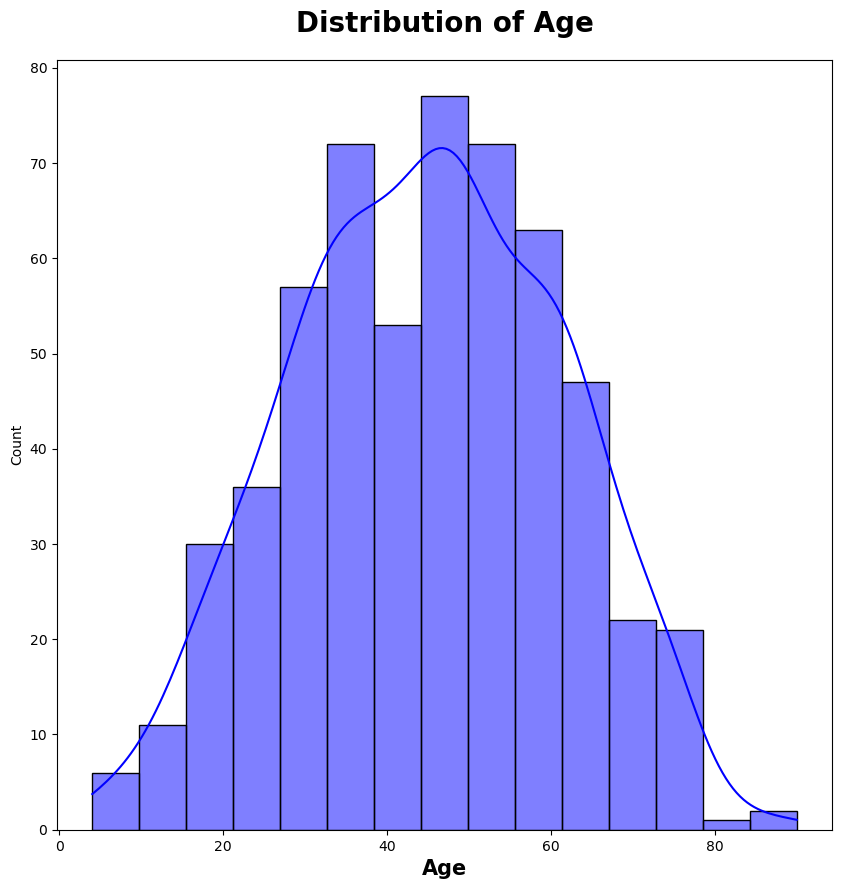

In [22]:
plt.subplots(figsize=(10,10))
sns.histplot("Distribution of Age", x=df.Age, color='b', kde=True)
plt.title("Distribution of Age", weight='bold', fontsize=20, pad=20)
plt.xlabel('Age', weight='bold', fontsize=15)

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

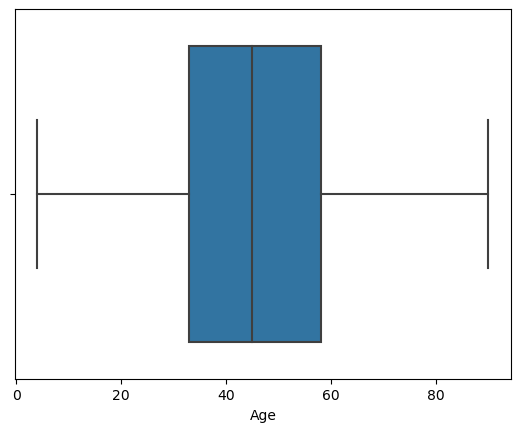

In [23]:
sns.boxplot(df['Age'])



**"Gender"**

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, "'Gender' column count plot")

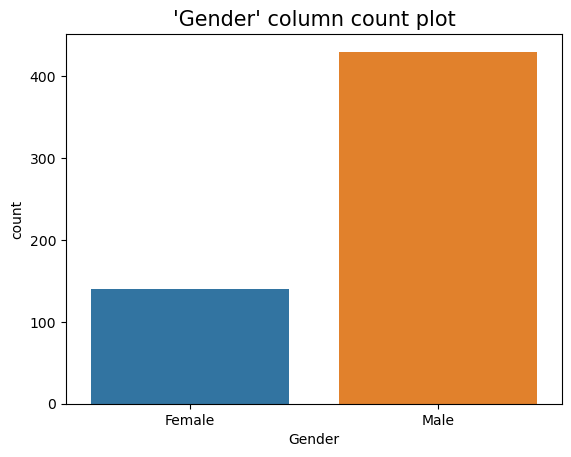

In [18]:
sns.countplot('Gender', data=df, palette="tab10")
plt.title("'Gender' column count plot", fontsize=15)

**"Total_Bilirubin"**

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Bilirubin'>

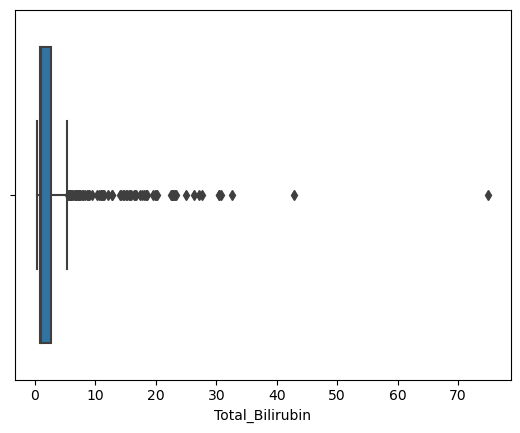

In [20]:
sns.boxplot(df['Total_Bilirubin'])

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Bilirubin', ylabel='Density'>

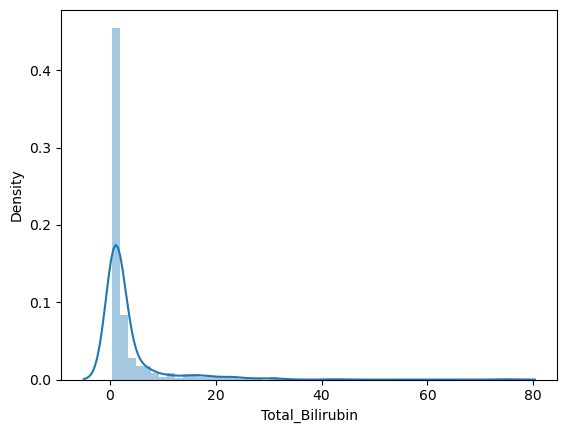

In [24]:
sns.distplot(df['Total_Bilirubin'])

**"Alkaline_Phosphotase"**

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alkaline_Phosphotase'>

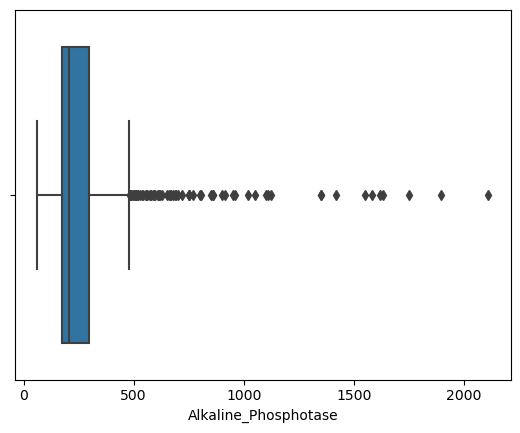

In [25]:
sns.boxplot(df['Alkaline_Phosphotase'])

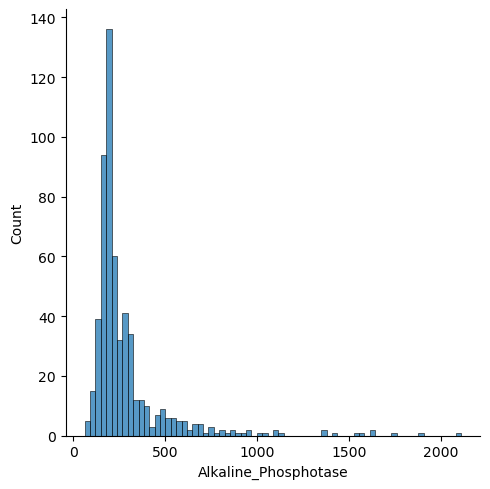

In [26]:
sns.displot(df['Alkaline_Phosphotase'])

**"Alamine_Aminotransferase"**

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alamine_Aminotransferase'>

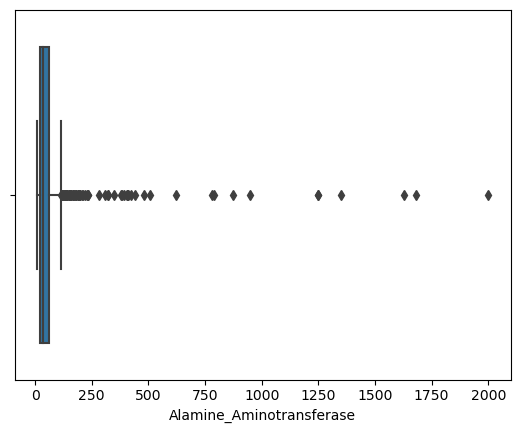

In [27]:
sns.boxplot(df['Alamine_Aminotransferase'])

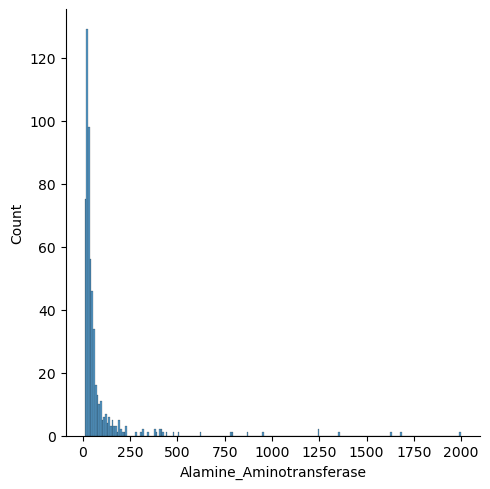

In [28]:
sns.displot(df['Alamine_Aminotransferase'])

**"Aspartate_Aminotransferase"**

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

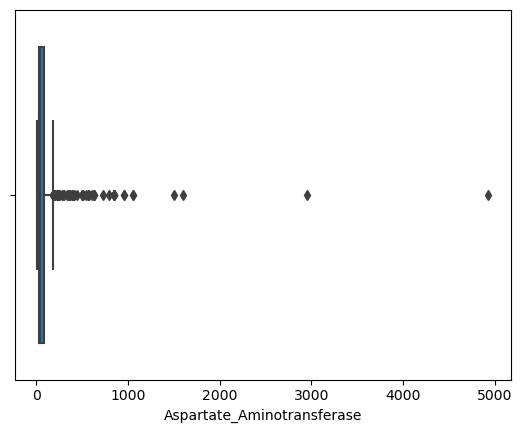

In [29]:
sns.boxplot(df['Aspartate_Aminotransferase'])

Text(0.5, 0, 'Aspartate_Aminotransferase')

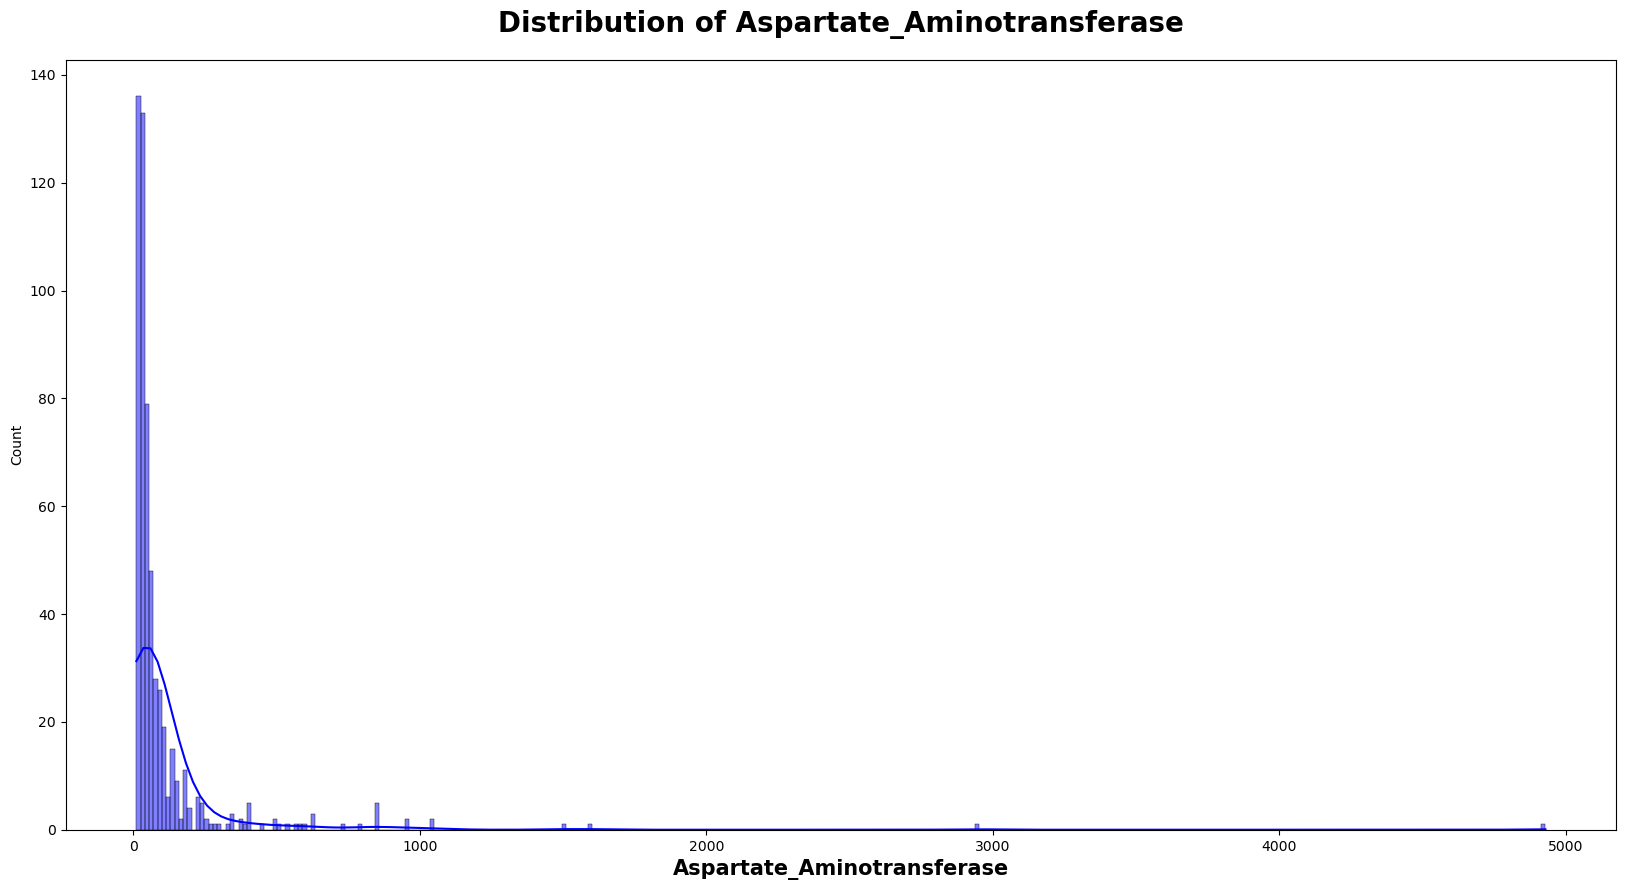

In [38]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Aspartate_Aminotransferase", x=df.Aspartate_Aminotransferase, color='b', kde=True)
plt.title("Distribution of Aspartate_Aminotransferase", weight='bold', fontsize=20, pad=20)
plt.xlabel('Aspartate_Aminotransferase', weight='bold', fontsize=15)

**"Total_Protiens"**

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Protiens'>

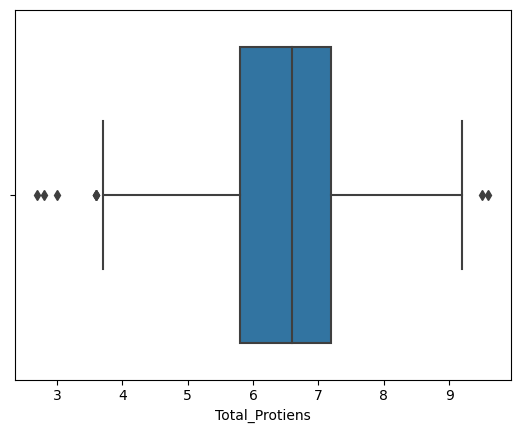

In [31]:
sns.boxplot(df['Total_Protiens'])

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Protiens', ylabel='Density'>

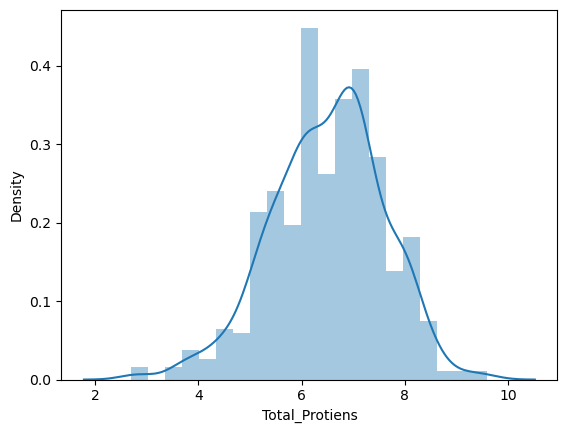

In [32]:
sns.distplot(df['Total_Protiens'])

**"Albumin"**

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Albumin'>

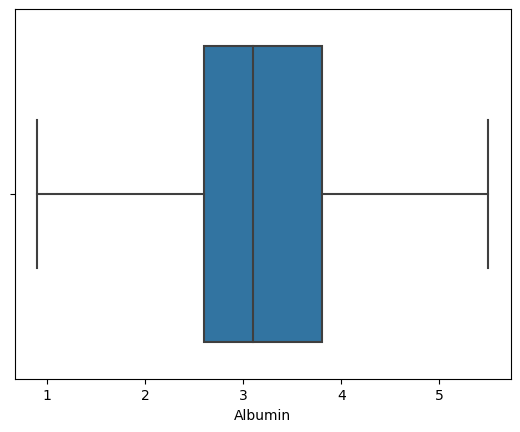

In [33]:
sns.boxplot(df['Albumin'])

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Albumin', ylabel='Density'>

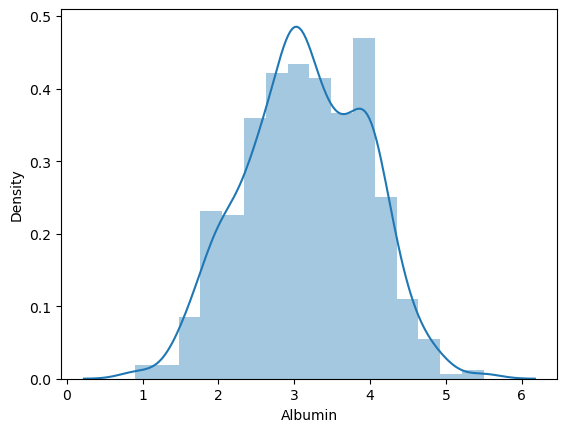

In [34]:
sns.distplot(df['Albumin'])

**"Albumin_and_Globulin_Ratio"**

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Albumin_and_Globulin_Ratio'>

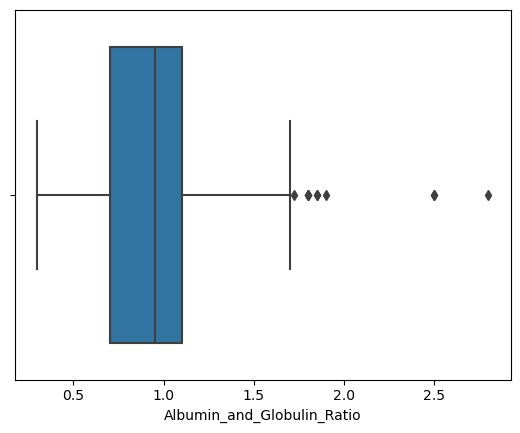

In [35]:
sns.boxplot(df['Albumin_and_Globulin_Ratio'])

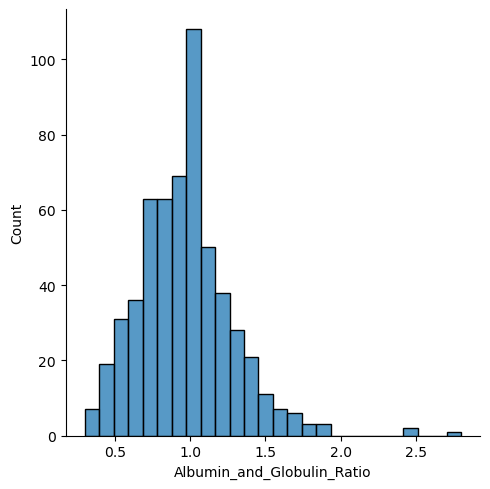

In [36]:
sns.displot(df['Albumin_and_Globulin_Ratio'])

**"Dataset"**

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dataset', ylabel='count'>

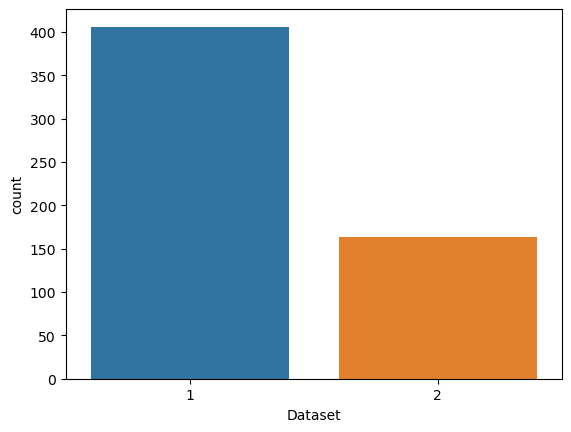

In [39]:
sns.countplot(df['Dataset'])

### Bivariate Analysis

In [46]:
# Summerizing the dataset
from skimpy import skim


skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 570    │ │ int32       │ 5     │                                                          │
│ │ Number of columns │ 11     │ │ float64     │ 5     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA   ┃ NA %    ┃ mean   ┃ sd     ┃ p0    ┃ p25   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Age                          │    0 │       0 │     45 │     16 │     4 │    33 │    58 │     90 │  ▂▅██▄  │  │
│ │ Total_Bilirubin              │    0 │       0 │    3.3 │    6.3 │   0.4 │   0.8 │   2.6 │     75 │    █    │  │
│ │ Direct_Bilirubin             │    0 │       0 │    1.5 │    2.8 │   0.1 │   0.2 │   1.3 │     20 │    █    │  │
│ │ Alkaline_Phosphotase         │    0 │       0 │    290 │    250 │    63 │   180 │   300 │   2100 │   █▁    │  │
│ │ Alamine_Aminotransfe         │    0 │       0 │     80 │    180 │    10 │    23 │    60 │   2000 │    █    │  │
│ │ Aspartate_Aminotrans         │    0 │       0 │    110 │    290 │    10 │    25 │    87 │   4900 │    █    │  │
│ │ Total_Protiens               │    0 │       0 │    6.5 │    1.1 │   2.7 │   5.8 │   7.2 │    9.6 │   ▁▆█▄  │  │
│ │ Albumin                      │    0 │       0 │    3.1 │    0.8 │   0.9 │   2.6 │   3.8 │    5.5 │  ▁▄█▇▄  │  │
│ │ Albumin_and_Globulin         │    4 │     0.7 │   0.95 │   0.32 │   0.3 │   0.7 │   1.1 │    2.8 │  ▄█▃▁   │  │
│ │ Dataset                      │    0 │       0 │    1.3 │   0.45 │     1 │     1 │     2 │      2 │ █    ▃  │  │
│ └──────────────────────────────┴──────┴─────────┴────────┴────────┴───────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                    │       0 │          0 │                            1 │                      570 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

#### Heatmap

In [55]:
# Finding the correlation in the dataset

corr = df.corr()

<AxesSubplot:>

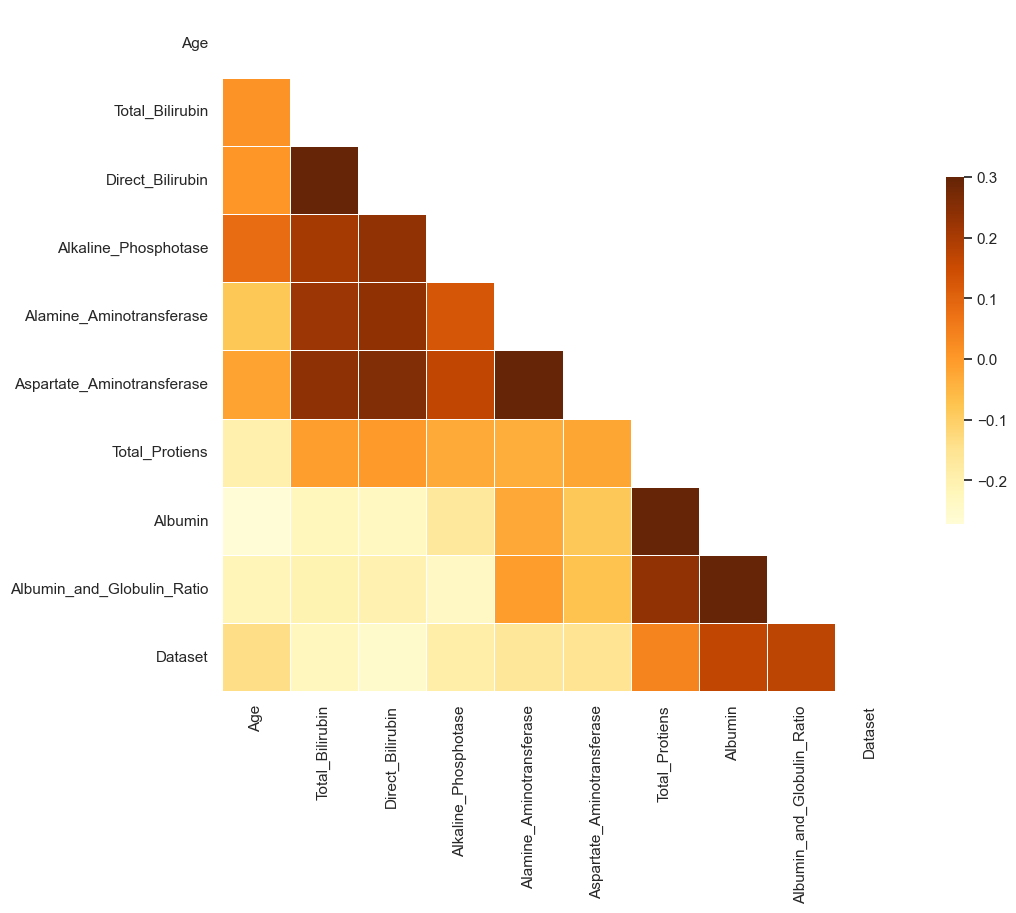

In [58]:
# Plotting 'AxesSubplot' to display correlation

sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')